# The Sparks Foundation - GRIP

## Data Science and business Analytics

## Task 6: Prediction using Decision tree algorithm

### Arti Gupta

## Description of the dataset
This dataset contain 5 columns and 150 rows and this dataset contain attributes such as Id, SepalLengthCm,PetalLengthCm etc. I am going to analyze the data deeply and try to get some useful insights.

It includes 6 variables.These variables are described below:
1. Id: A unique identifier for each observation.
2. SepalLengthCm: The length of the sepal of the iris flower in centimeters.
3. SepalWidthCm: The width of the sepal of the iris flower in centimeters.
4. PetalLengthCm: The length of the petal of the iris flower in centimeters.
5. PetalWidthCm: The width of the petal of the iris flower in centimeters.
6. Species: The species of the iris flower. This is a categorical variable that indicates the class label for each observation. 

## Goal of the Project
In this projet, I am going to develp a machine learning model that accurately classifies iris flowers into one of three species (Setosa, Versicolor, Virginica) based on their sepal length, sepal width, petal length, and petal width measurements.

## Tools Used
1. pandas for data manipulation
2. numpy is mostly used for working in numerical values
3. Seaborn and matplotlib  for visualization graph.
4. Sklearn for training and testing data

## Load the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

In [7]:
df.shape

(150, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


This shows that both columns have 150 non-null entries, the dataset is complete with no missing values.Id indicates that the values are integers.SepalLengthCm,SepalWidthCm,PetalLengthCm and PetalWidthCm indicates that the values are float and Species indicates that the values are an object.

In [61]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

It shows that there are no null values.

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


The given statistics provide a summary of the data:
1. The average sepal length is approximately 5.84 cm, with a range from 4.3 cm to 7.9 cm. Most of the sepal lengths fall between 5.1 cm and 6.4 cm.
2. The average sepal width is approximately 3.05 cm, with a range from 2.0 cm to 4.4 cm. The interquartile range (IQR) is 2.8 cm to 3.3 cm, indicating that most of the sepal widths are within this range.
3. The average petal length is approximately 3.76 cm, with a wide range from 1.0 cm to 6.9 cm. The IQR is 1.6 cm to 5.1 cm, suggesting a broad distribution of petal lengths.
4. The average petal width is approximately 1.20 cm, with a range from 0.1 cm to 2.5 cm. The IQR is 0.3 cm to 1.8 cm, indicating a wide variance in petal widths.

In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

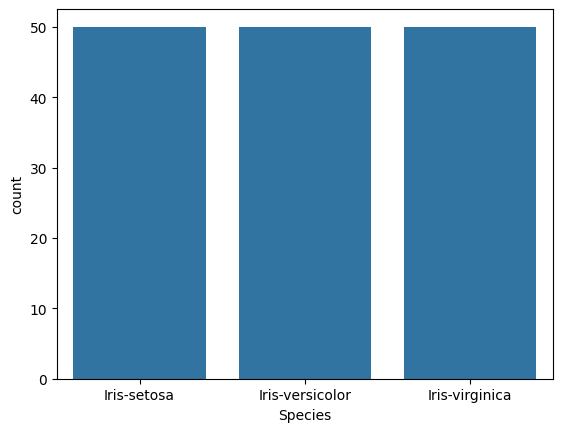

In [86]:
sns.countplot(x='Species', data=df, ) 
plt.show()

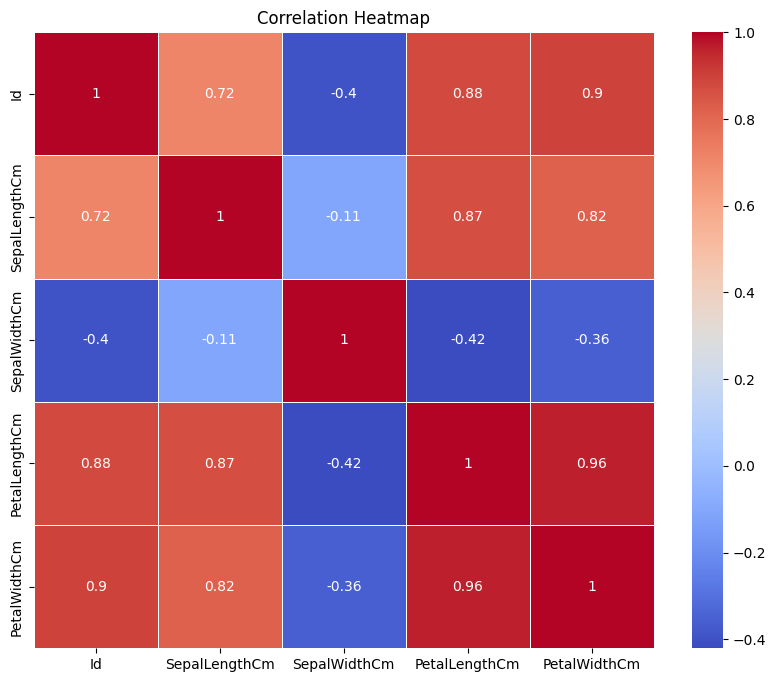

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(exclude="object").corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Above heatmap shows that:
1.Petal width and petal length have high correlations. 
2.Petal length and sepal width have good correlations.
3.Petal Width and Sepal length have good correlations.

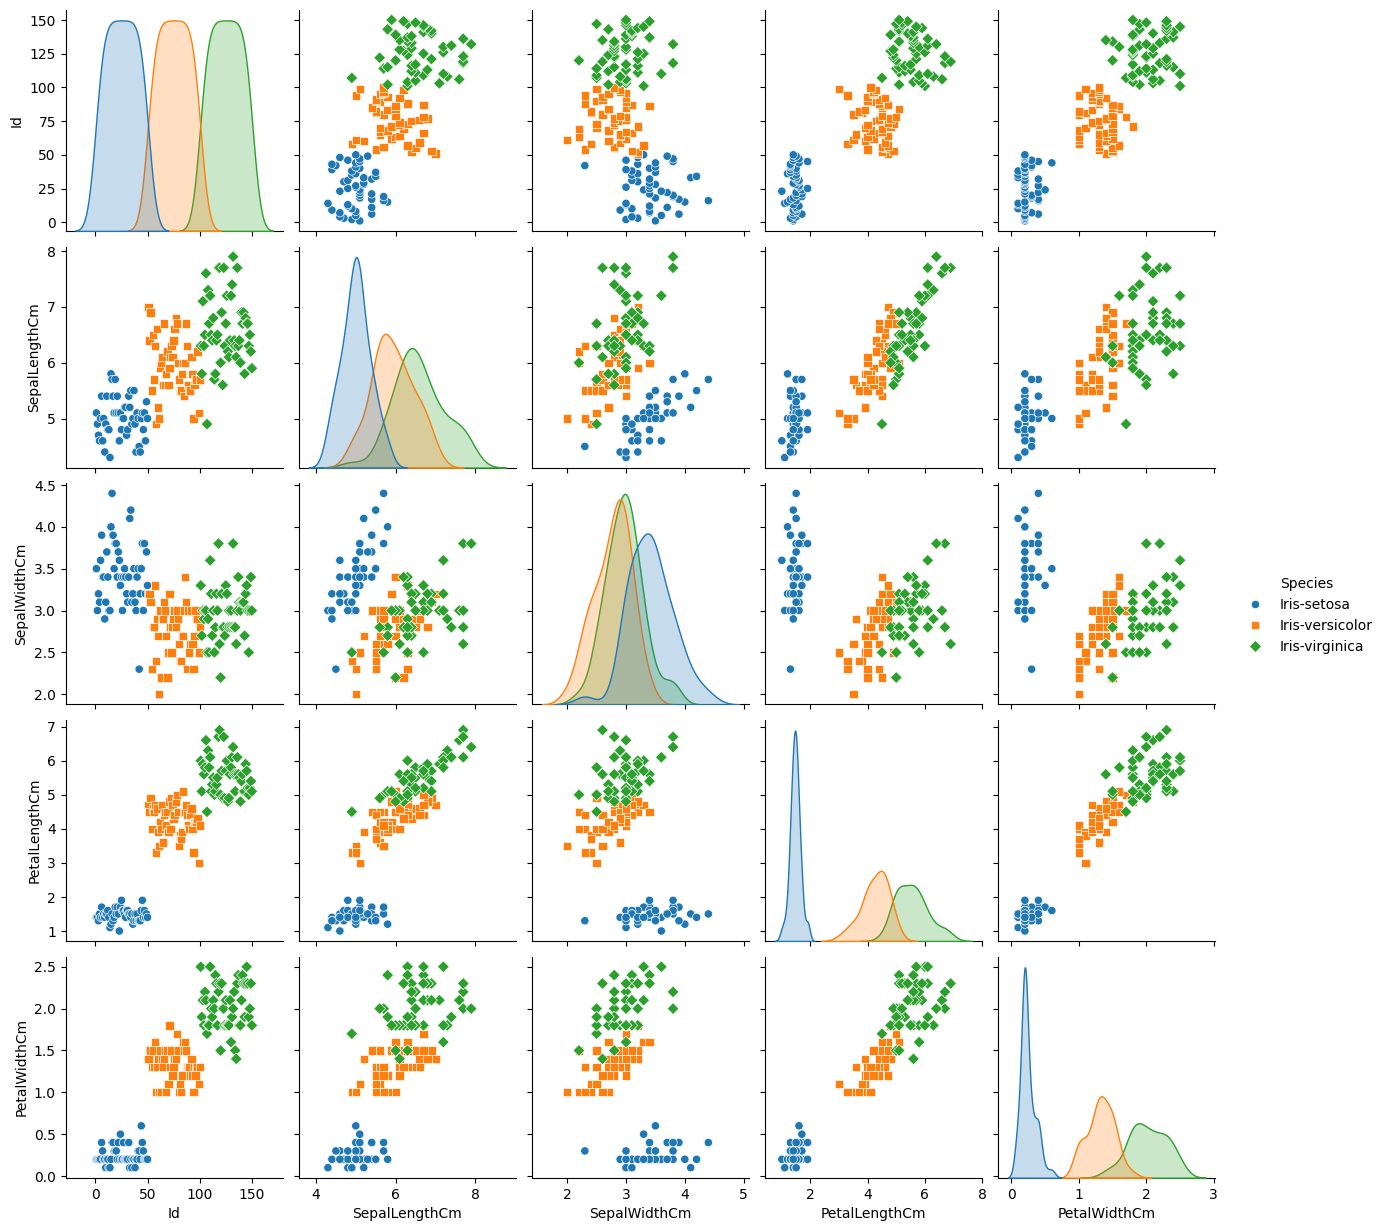

In [72]:
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.show()

We can see many types of relationships from this pairplot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths.

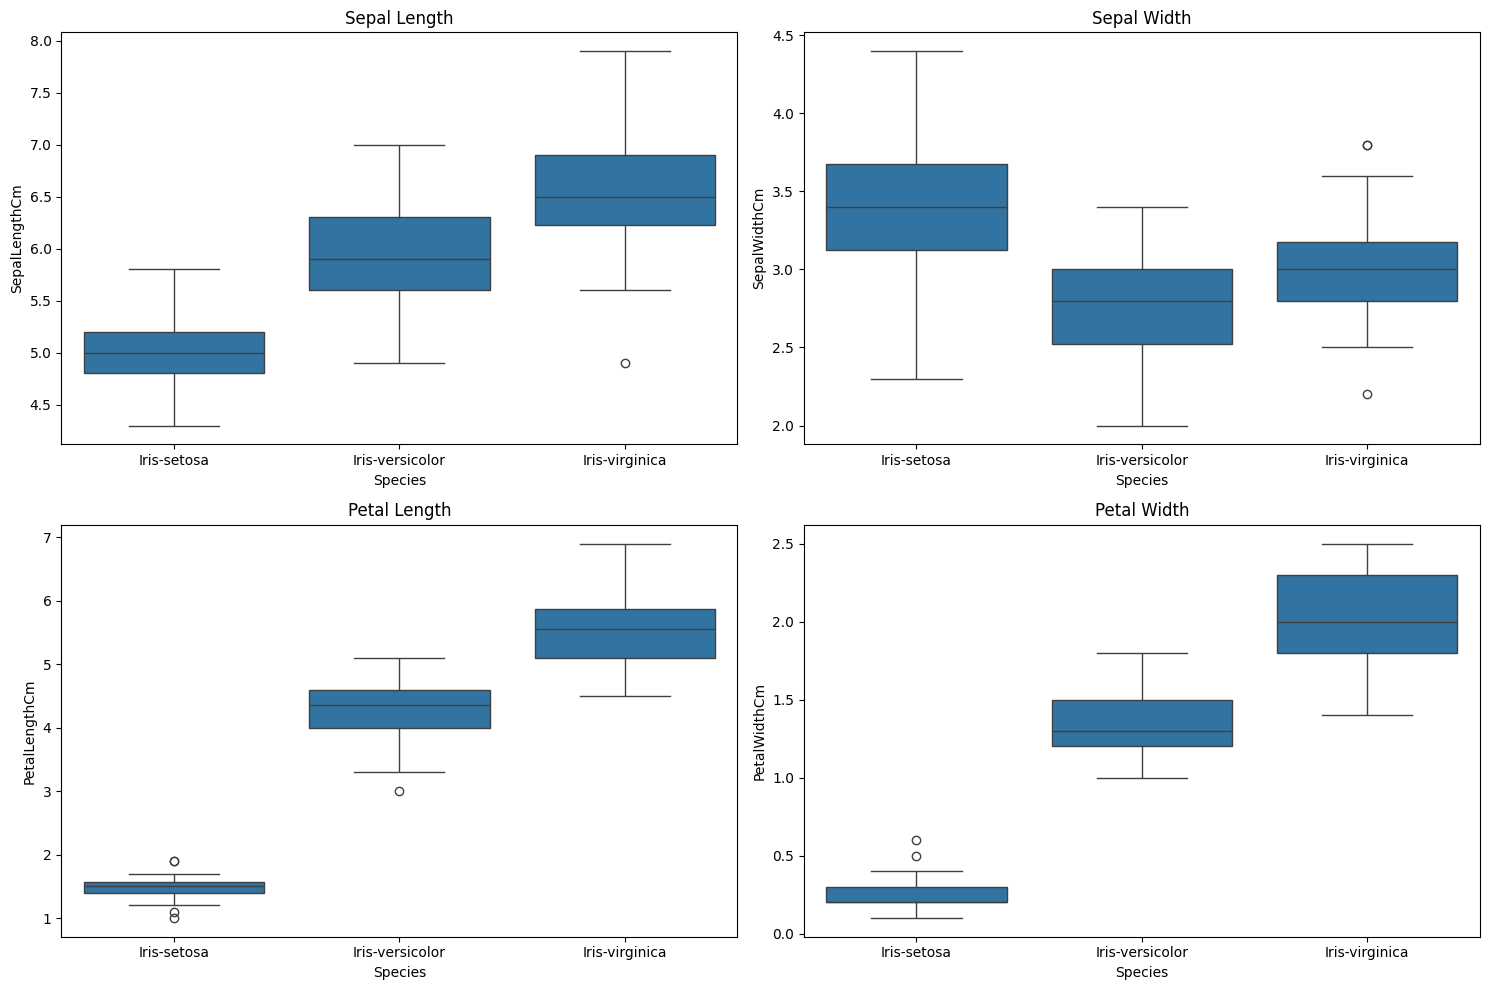

In [85]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width')

plt.tight_layout()
plt.show()

From the above heatmap, we can see that – 
1. Species Setosa has the smallest features and less distributed with some outliers.
2. Species Versicolor has the average features.
3. Species Virginica has the highest features

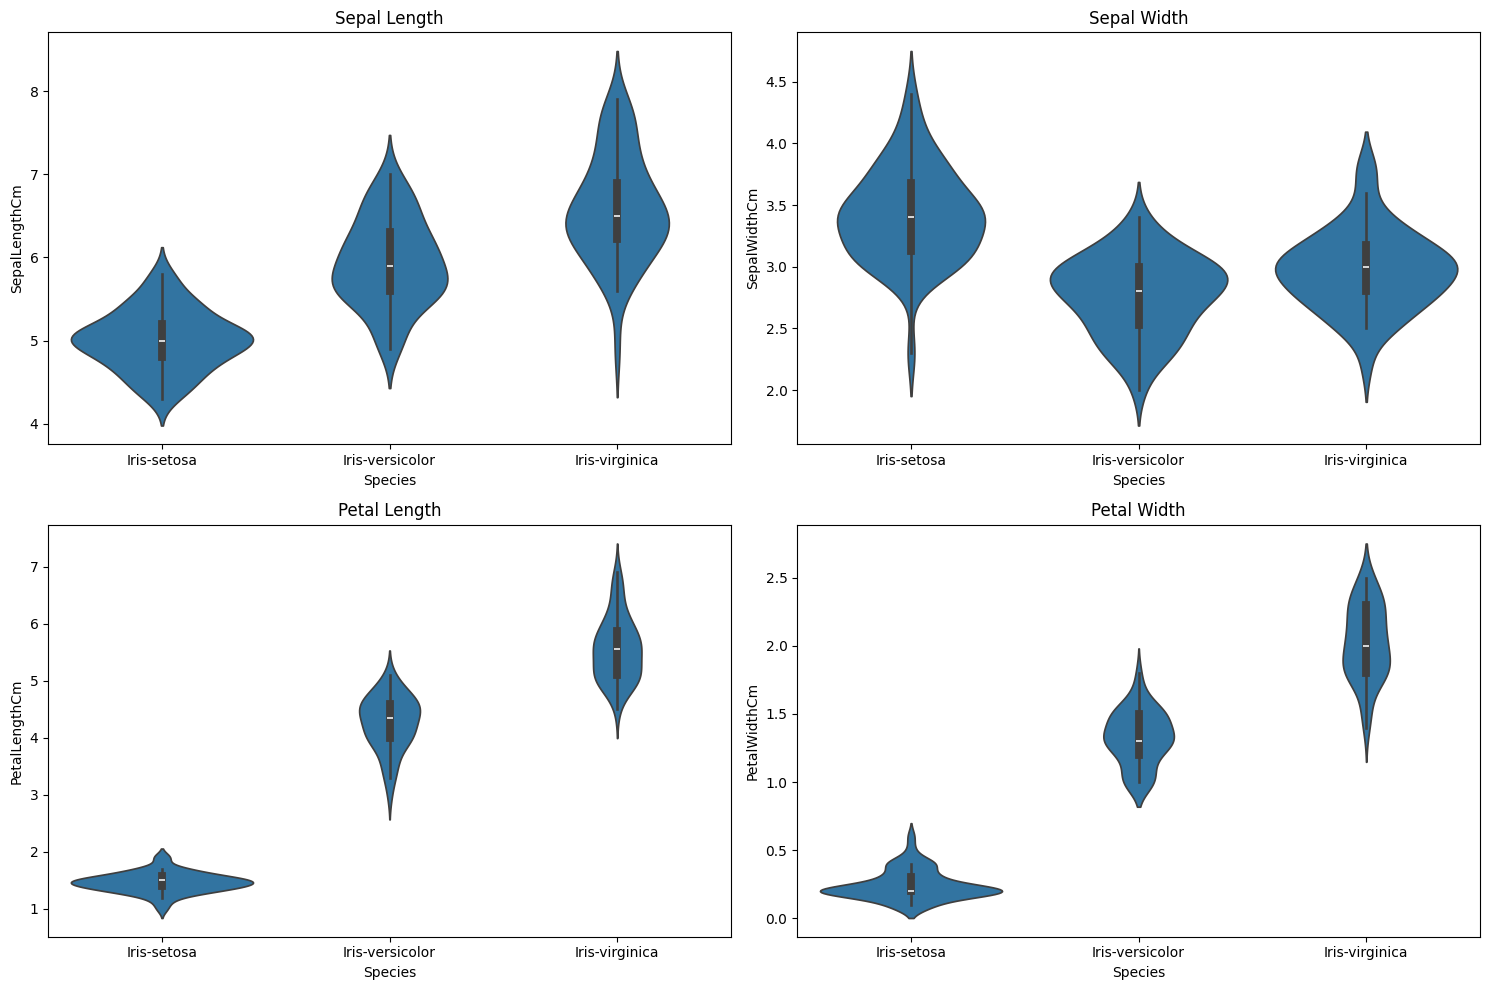

In [83]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length')

plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width')

plt.tight_layout()
plt.show()

From the above violinplot, we can see that –
1. Setosa has a lower dispersion density of petal width and length.
2. Versicolor is dispersed evenly and has average traits of petal length and breadth.
3. Virginica is widely dispersed, with sepal width and length showing a vast number of values and characteristics.
4. High-density values represent mean/median values. According to the table, Iris Setosa has the maximum density at 5.0 cm (sepal length characteristic), which is also the average value (5.0).

## Train and test data splitting

In [15]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
print("x_train\n\n",x_train)
print("\nx_test\n\n",x_test)
print("\ny_train\n\n",y_train)
print("\ny_test\n\n",y_test)

x_train

       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81    82            5.5           2.4            3.7           1.0
133  134            6.3           2.8            5.1           1.5
137  138            6.4           3.1            5.5           1.8
75    76            6.6           3.0            4.4           1.4
109  110            7.2           3.6            6.1           2.5
..   ...            ...           ...            ...           ...
71    72            6.1           2.8            4.0           1.3
106  107            4.9           2.5            4.5           1.7
14    15            5.8           4.0            1.2           0.2
92    93            5.8           2.6            4.0           1.2
102  103            7.1           3.0            5.9           2.1

[105 rows x 5 columns]

x_test

       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73    74            6.1           2.8            4.7           1.2
18    19          

## Decision Tree Classifier
A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It creates a model that predicts the value of a target variable based on several input features. The model represents decisions and their possible consequences, including outcomes, resource costs, and utility.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model=DecisionTreeClassifier(random_state=42,max_depth= None,min_samples_leaf=1,min_samples_split=2)

In [54]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred=model.predict(x_test)

## Hyperparameter Tuning

In [56]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.980952380952381


In [58]:
best_clf = grid_search.best_estimator_
best_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
accuracy_score(y_pred,y_test)

1.0

In [61]:
report=classification_report(y_pred,y_test)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [65]:
cv_scores = cross_val_score(model, x, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.83333333 1.         1.         1.         0.83333333]
Mean cross-validation score: 0.9333333333333333


## visualize a decision tree classifier

In [63]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

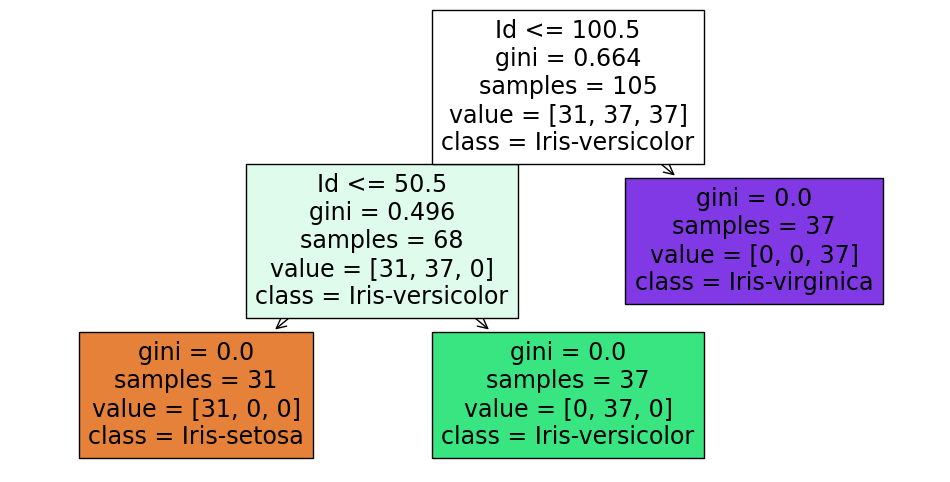

In [69]:
plt.figure(figsize=(12,6))
tree.plot_tree(model, feature_names=x.columns, class_names=model.classes_, filled=True)
plt.show()